The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

we build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/sairam/Downloads/datasets/train (1).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_new=df.drop(['Name','Ticket','Cabin'],axis=1)

In [5]:
df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


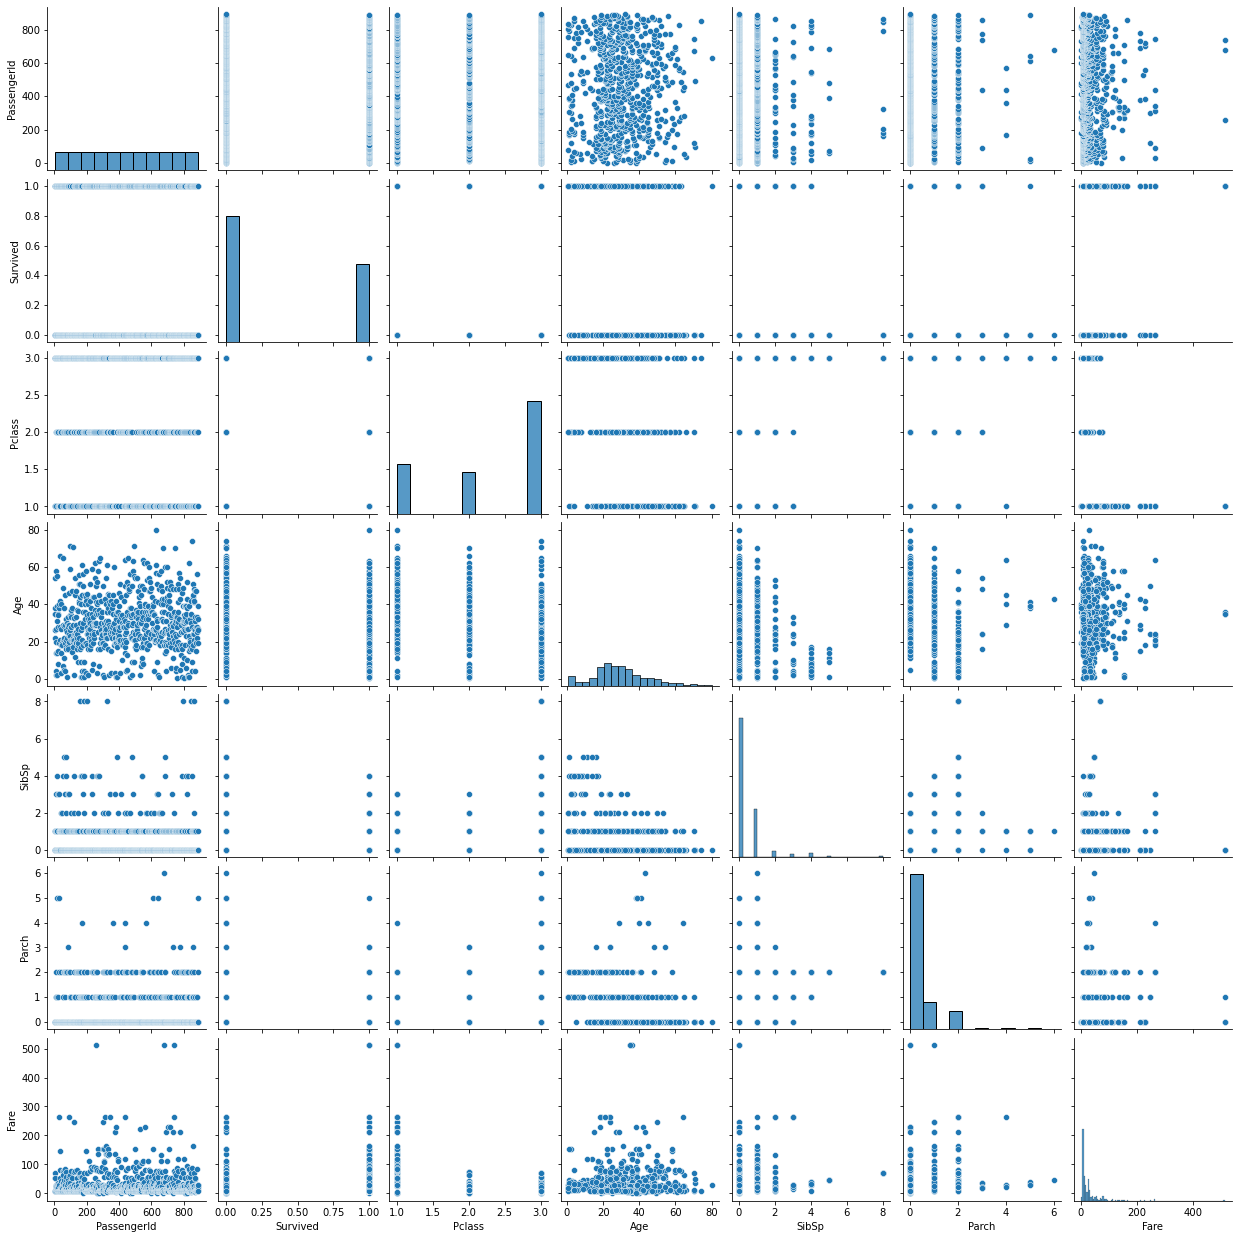

In [6]:
sns.pairplot(df_new)

In [7]:
df_new.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex'>

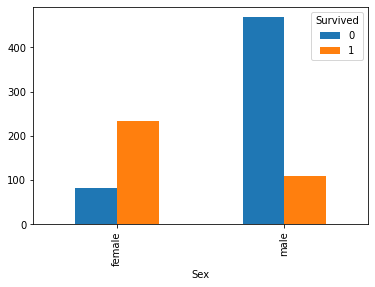

In [10]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind='bar')

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

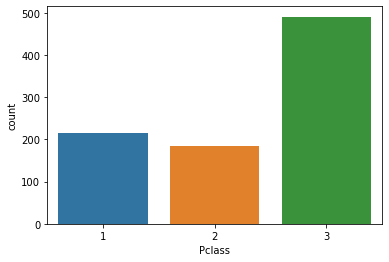

In [12]:
sns.countplot(x='Pclass',data=df_new)

<AxesSubplot:xlabel='Pclass'>

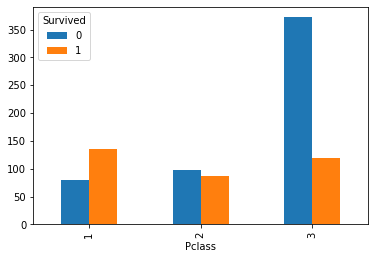

In [13]:
pd.crosstab(df_new['Pclass'],df_new['Survived']).plot(kind='bar')

In [15]:
df_new['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

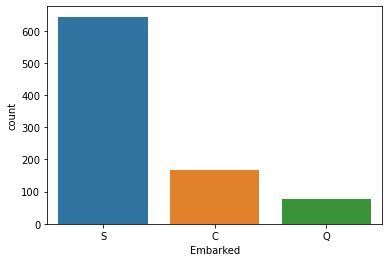

In [16]:
sns.countplot(x='Embarked',data=df_new)

<AxesSubplot:xlabel='Embarked'>

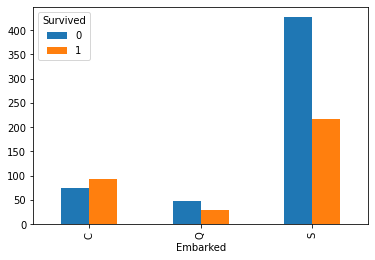

In [18]:
pd.crosstab(df_new['Embarked'],df_new['Survived']).plot(kind='bar')

<AxesSubplot:xlabel='Age'>

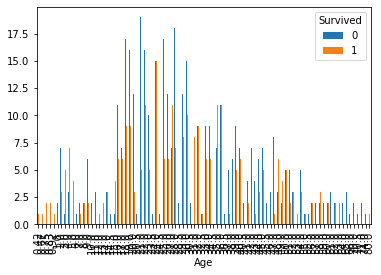

In [20]:
pd.crosstab(df_new['Age'],df_new['Survived']).plot(kind='bar')

<AxesSubplot:>

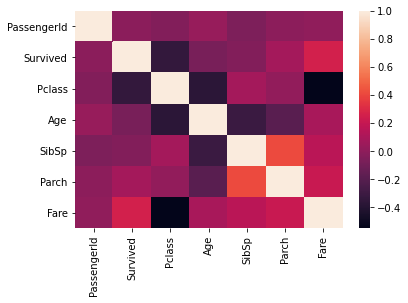

In [25]:
sns.heatmap(df_new.corr())

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [27]:
df_new['Age'].fillna(df.Age.mean(),inplace=True)

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [31]:
df_new['Embarked'].fillna(df.Embarked.mode()[0],inplace=True)

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [44]:
df_new=pd.get_dummies(df_new,drop_first=True)

In [35]:
from sklearn.linear_model import LogisticRegression

In [45]:
x=df_new.loc[:,df_new.columns!='Survived']
y=df_new['Survived']

In [46]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
log_reg=LogisticRegression()


In [50]:
log_reg.fit(x,y)

C:\Users\sairam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
log_reg.score(x,y)

0.7890011223344556

In [52]:
log_reg.coef_

array([[ 8.32339318e-04, -3.28474330e-01, -6.69010074e-03,
        -1.25228695e-01, -2.93100974e-01,  1.21272692e-02,
        -2.53346818e+00,  1.31054163e-01,  1.31580448e-01]])

In [53]:
log_reg.intercept_

array([1.25346978])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [57]:
log_reg1=LogisticRegression()

In [58]:
log_reg1.fit(x_train,y_train)

C:\Users\sairam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
log_reg1.score(x_train,y_train)

0.7879213483146067

In [60]:
log_reg1.score(x_test,y_test)

0.8212290502793296

In [61]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_train,log_reg1.predict(x_train))

array([[379,  61],
       [ 90, 182]], dtype=int64)

In [74]:
confusion_matrix(y_test,log_reg1.predict(x_test))

array([[97, 12],
       [20, 50]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score

In [75]:
accuracy_score(y_train,log_reg1.predict(x_train))

0.7879213483146067

In [76]:
accuracy_score(y_test,log_reg1.predict(x_test))

0.8212290502793296

In [77]:
recall_score(y_train,log_reg1.predict(x_train))

0.6691176470588235

In [78]:
recall_score(y_test,log_reg1.predict(x_test))

0.7142857142857143

In [79]:
roc_auc_score(y_train,log_reg1.predict(x_train))

0.7652406417112299

In [80]:
roc_auc_score(y_test,log_reg1.predict(x_test))

0.8020969855832242

In [72]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_train,log_reg1.predict(x_train)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       440
           1       0.75      0.67      0.71       272

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [82]:
print(classification_report(y_test,log_reg1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       109
           1       0.81      0.71      0.76        70

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [84]:
from sklearn import metrics

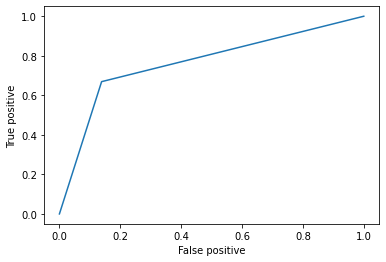

In [86]:
fpr,tpr,threshold=metrics.roc_curve(y_train,log_reg1.predict(x_train))
plt.plot(fpr,tpr)
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.show()

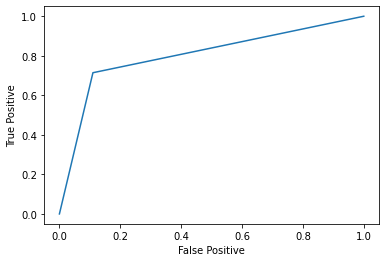

In [87]:
fpr1,tpr1,threshold1=metrics.roc_curve(y_test,log_reg1.predict(x_test))
plt.plot(fpr1,tpr1)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()

In [88]:
metrics.auc(fpr,tpr)

0.7652406417112299

In [90]:
metrics.auc(fpr1,tpr1)

0.8020969855832242

We can also check if KN algorithm gives better accuracy or not

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn=KNeighborsClassifier(n_neighbors=3)

In [93]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
knn.score(x_train,y_train)

0.7794943820224719

In [95]:
knn.score(x_test,y_test)

0.6759776536312849

In [96]:
train_pred=knn.predict(x_train)
test_pred=knn.predict(x_test)

In [97]:
accuracy_score(y_train,train_pred)

0.7794943820224719

In [98]:
accuracy_score(y_test,test_pred)

0.6759776536312849

In [99]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       440
           1       0.76      0.61      0.68       272

    accuracy                           0.78       712
   macro avg       0.77      0.75      0.76       712
weighted avg       0.78      0.78      0.77       712



In [100]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       109
           1       0.59      0.57      0.58        70

    accuracy                           0.68       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.67      0.68      0.68       179

